# Modèles simples de réseaux à commutation de paquets

---

__Objectifs__ : Modéliser les réseaux à commutation de paquets par des modèles de réseaux de files d’attentes
simples. Etudier l’impact de la durée de la simulation sur les intervalles de confiance. Valider les résultats
obtenus par simulation.

---

Une source de trafic génère des paquets dont l’inter-arrivée est exponentiellement distribuée de
moyenne 1/$\lambda$. Les paquets sont envoyés sans mise en place de mécanismes de contrôle (ni contrôle
de flux, ni contrôle de congestion).

Nous nous intéressons au dimensionnement des files de sortie d’un noeud de commutation. Dans la
première partie, nous supposons que ces noeuds de commutations n’ont aucune limitation de
capacité. Les tailles des datagrammes et des trames sont considérées infinies.

### Simulation de files M/M/1, M/D/1
La taille des paquets est exponentiellement distribuée de moyenne (100000 bits/8 $\mu$). La capacité du
lien de sortie des noeuds de commutation est de 100Kbps.

1) Observer, le temps de réponse (de l’émission du premier bit du paquet par la source jusqu’à la
réception du dernier bit du paquet par la destination) et le nombre de paquets pour $\lambda=20$ et $\mu=33$ et
pour une durée de simulation de 10sec :
    - a. Tracer le temps de réponse.
    - b. Tracer également les nombres, instantané et moyen, de paquets dans la file en fonction du
temps.

Lancement de la simulation
Traitement du temps de reponse (tr)
    nb_pkt   tr_instant      tr_mean     int_conf    borne_inf    borne_sup
     17230     0.028160     0.079701     0.001193     0.078508     0.080895
Traitement de la taille des files d'attente (fa)
             fa_instant      fa_mean     int_conf    borne_inf    borne_sup
                      0     1.695543     0.155195     1.540348     1.850738
Affichage des graphes tr & fa

Affichage des graphes tr & fa


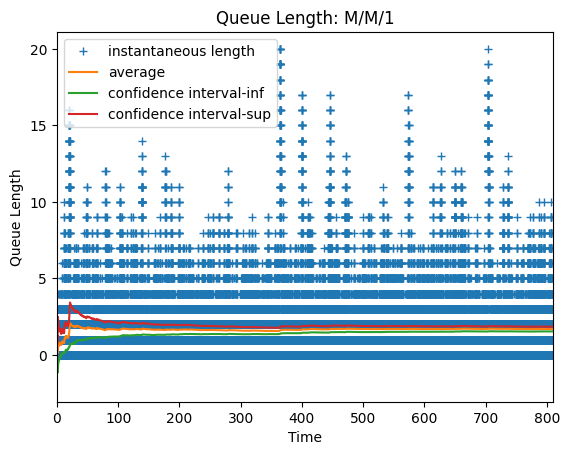

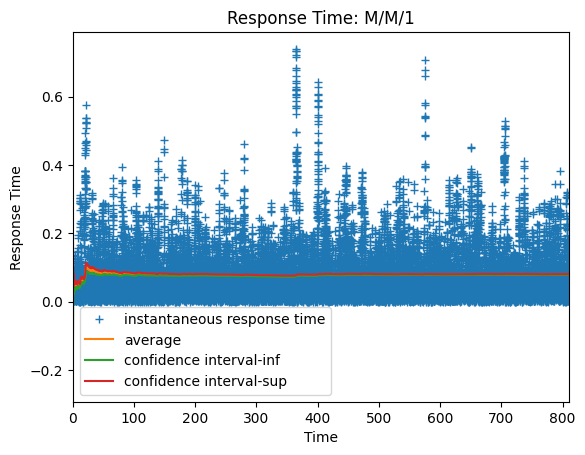

In [12]:
# ns doit être installé pour lancer ce script (apt install ns2)
# version recommandée de python: 3.8
# Ce script permet de lancer une simulation de file d'attente M/M/1
import subprocess
import os
from MM1.utils import plot_length, plot_response

plot = True # True pour afficher les graphes de longueur de file d'attente et de temps de réponse
cwd = os.getcwd()
os.chdir(f"{cwd}/MM1")
lambda_val = 19.8
mu = 33.0
duration = 810  # sec
mm1 = subprocess.run(["sh" , "sim_mm1.sh", str(lambda_val), str(mu), str(duration)], capture_output=True, text=True)
print(mm1.stdout)

if (plot):
    print("Affichage des graphes tr & fa")
    plot_length(duration, "Queue Length: M/M/1")
    plot_response(duration, "Response Time: M/M/1")

os.chdir("..")



2) Trouver par simulation le nombre moyen de paquets dans la file d’émission ainsi que le temps
moyen de réponse, pour une charge variant de 0.3, 0.6 et 0.9.
Observer le temps de réponse moyen, le nombre moyen de clients ainsi que les intervalles de
confiance associés en fonction de la durée de la simulation.


3) Reprendre les deux premières questions, pour des paquets de taille constante et comparer les résultats.


Lancement de la simulation
Traitement du temps de reponse (tr)
    nb_pkt   tr_instant      tr_mean     int_conf    borne_inf    borne_sup
     12645     0.054754     0.054474     0.000575     0.053899     0.055048
Traitement de la taille des files d'attente (fa)
             fa_instant      fa_mean     int_conf    borne_inf    borne_sup
                      2     1.093536     0.097253     0.996283     1.190790
Affichage des graphes tr & fa

Affichage des graphes tr & fa


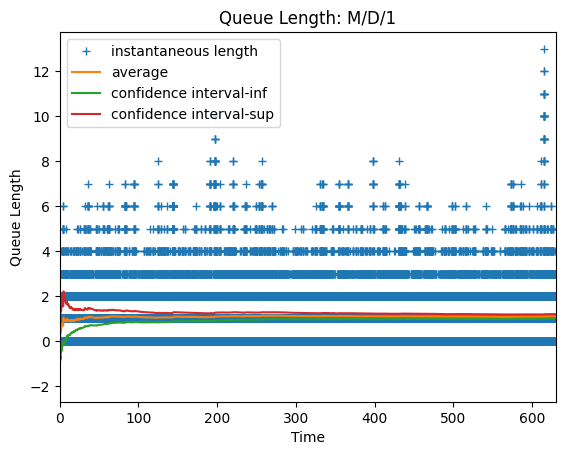

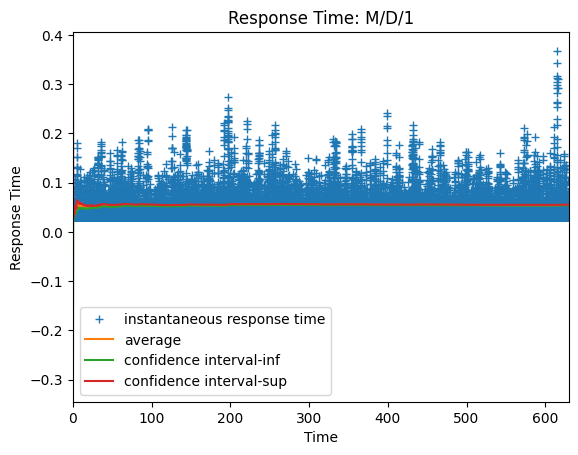

In [9]:
import subprocess
import os
from MM1.utils import plot_length, plot_response
plot = True # True pour afficher les graphes de longueur de file d'attente et de temps de réponse
lambda_val = 20.0
mu = 33.0
duration = 630  # sec

os.chdir(f"{os.getcwd()}/MM1")

md1 = subprocess.run(["sh" , "sim_md1.sh", str(lambda_val), str(mu), str(duration)], capture_output=True, text=True)
print(md1.stdout)

if (plot):
    print("Affichage des graphes tr & fa")
    plot_length(duration, "Queue Length: M/D/1")
    plot_response(duration, "Response Time: M/D/1")

os.chdir("..")

### Simulation de files de taille finie
Dans le modèle précédent, les buffers sont considérés de très grande taille afin d’éviter les pertes.
Utiliser les buffers de capacité limitée, peut être modélisé par une file M/M/1/K.
1) Déterminer par simulation la probabilité de rejet de paquets pour $K=2$,
$\lambda=20$ et $\mu=33$.


2) Tracer le taux de rejet en fonction de K.


Capa. file	Tx analy.	Tx simu.
1	0.377358490566038	1
2	0.186133085155886	0.132173335696261
3	0.101372327888795	0.0484308581669508
4	0.0578816544457995	0.0183035346564062
5	0.0338909047328468	0.00687661775240682
6	0.0201265442063919	0.00251102630087886
7	0.0120509097207096	0.000948499000331975
8	0.00725062610912116	0.000321990450112697
9	0.00437509329904079	0.000102338050035818
10	0.00264455945738175	3.49447000122306e-05
11	0.00160019856795465	1.49763000052417e-05
12	0.000968877679563206	2.49605000087362e-06
13	0.000586853993834798	0
14	0.000355542631649355	0
15	0.000215433961025397	0
16	0.000130548991720608	0
17	7.91143414685446e-05	0
18	4.79457868298142e-05	0
19	2.90572082782425e-05	0
20	1.76101191377836e-05	0

-----------------------
1	0.377358490566038	1
2	0.186133085155886	0.186670436320784
3	0.101372327888795	0.101950796005835
4	0.0578816544457995	0.0583687572401128
5	0.0338909047328468	0.0341320496493471
6	0.0201265442063919	0.0203060925783684
7	0.0120509097207096	0.01220467220272

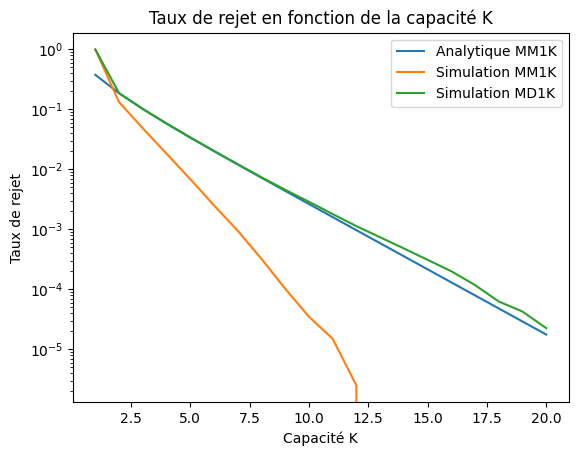

In [4]:
import subprocess
import os
from concurrent.futures import ThreadPoolExecutor, as_completed
import matplotlib.pyplot as plt

# Déplacer le répertoire de travail
os.chdir("MM1K")

# Valeurs initiales
lambda_val, mu, duration1, duration2 = 20, 33, 20000, 20000  # msec

def run_script(script_name, lambda_val, mu, duration):
    result = subprocess.run(["perl", script_name, str(lambda_val), str(mu), str(duration)], capture_output=True, text=True)
    return result.stdout

# Utilisation de ThreadPoolExecutor pour exécuter les scripts en parallèle
with ThreadPoolExecutor() as executor:
    futures = []
    futures.append(executor.submit(run_script, "rejet.pl", lambda_val, mu, duration1))
    futures.append(executor.submit(run_script, "rejetMD1K.pl", lambda_val, mu, duration2))
    results = [future.result() for future in as_completed(futures)]


print("Capa. file\tTx analy.\tTx simu.")
print(results[0])
print("-----------------------")
print(results[1])

lines, lines2 = list(map(lambda listi : list(filter(lambda y: y.strip() != "", listi)) ,list(map(lambda x: x.replace("\t", " ").split("\n"), results))))

# Traiter la sortie du premier script
x_rej, y1_rej, y2_rej = zip(*[map(float, line.split(" ")) for line in lines])

# Traiter la sortie du deuxième script
x_rej2, y1_rej2, y2_rej2 = zip(*[map(float, line.split(" ")) for line in lines2])

# Plot des résultats 
plt.xlabel("Capacité K")
plt.ylabel("Taux de rejet")
plt.yscale("log")
plt.title("Taux de rejet en fonction de la capacité K")
plt.plot(x_rej, y1_rej, label="Analytique MM1K")
plt.plot(x_rej, y2_rej, label="Simulation MM1K")
plt.plot(x_rej2, y2_rej2, label="Simulation MD1K")
plt.legend()
plt.show()

# Revenir au répertoire précédent
os.chdir("..")


3) Reprendre la question précédente, pour des paquets de taille constante.


### Simulation d’un système composé de deux noeuds de commutation.
Trouver le temps de réponse du système dans le cas où la source et la destination sont séparées par
un noeud de commutation de même caractéristiques (Pour des paquets de taille exponentiellement
distribuée et pour des paquets de taille constante).

1) Trouver la loi d'arrivée des paquets dans la 2ème file lorsque la première est suit une loi exponentielle de paramètre $\lambda$

2) Observer ce résultat par simulation

In [ ]:
from NET_MM1.utils import plot_response
import subprocess


mm1 = subprocess.run(["sh", "./sim"], cwd="./NET_MM1", capture_output=True, text=True)

if mm1.returncode != 0:
    print(mm1.stderr)
else:
    print(mm1.stdout)
    
    
os.chdir("NET_MM1/trace_Response")

# Plot data for avr_response1.out
plot_response('avr_response1.out', 20, "MM1: Temps de réponse serv 1 [0:20]", yerr_idx=5)
plot_response('avr_response1.out', 2000, "MM1: Temps de réponse serv 1 [0:2000]", confidence_intervals=(5, 6))

# Plot data for avr_response2.out
plot_response('avr_response2.out', 20, "MM1: Temps de réponse serv 2 [0:20]", yerr_idx=5)
plot_response('avr_response2.out', 2000, "MM1: Temps de réponse serv 2 [0:2000]", confidence_intervals=(5, 6))

os.chdir("../..")

3) Observer par simulation le comportement de la deuxième file dans le cas d'une première file MD1. Expliquer ce comportement.

In [ ]:
from NET_MM1.utils import plot_response
import subprocess

print(os.getcwd())

md1 = subprocess.run(["sh", "./run.simu"], cwd="./NET_MD1", capture_output=True, text=True)

if md1.returncode != 0:
    print(md1.stderr)
else:
    print(md1.stdout)
    
    
os.chdir("NET_MD1/trace_Response")

# Plot data for avr_response1.out
plot_response('avr_response1.out', 20, "MD1: Temps de réponse serv 1 [0:20]", yerr_idx=5)
plot_response('avr_response1.out', 2000, "MD1: Temps de réponse serv 1 [0:2000]", confidence_intervals=(5, 6))

# Plot data for avr_response2.out
plot_response('avr_response2.out', 20, "MD1: Temps de réponse serv 2 [0:20]", yerr_idx=5)
plot_response('avr_response2.out', 2000, "MD1: Temps de réponse serv 2 [0:2000]", confidence_intervals=(5, 6))

os.chdir("../..")